## **CREATION OF LONDON GRAPH USING OPENSTREETMAP AND PRINT USEFUL INFORMATION** ##

/Users/deboroh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# of node: 128155
# of edge : 299415
average degree: 4.672701026101206


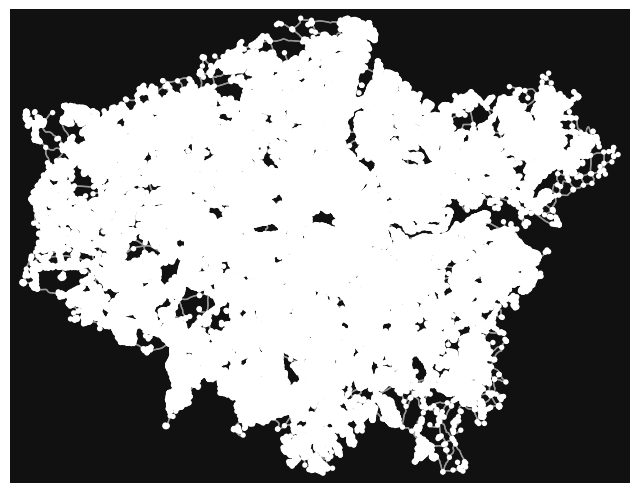

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# We set the location as London and download the graph
location = "London, United Kingdom"

graph = ox.graph_from_place(location, network_type="drive")

ox.io.save_graphml(graph, filepath="london_graph.graphml")

# We obtain the information about the graph
num_nodes = nx.number_of_nodes(graph)
num_edges = nx.number_of_edges(graph)
average_degree = sum(dict(graph.degree()).values()) / num_nodes

# Prints the values found, plots the graph, and saves the graph
print("# of node:", num_nodes)
print("# of edge :", num_edges)
print("average degree:", average_degree)
ox.plot_graph(ox.project_graph(graph), show=False)
plt.savefig("london_graph.png")
plt.show()

## **GRAPH FEATURES**
Let's plot the features related to the nodes and edges of the London graph. Additionally, we will compute the degree centrality for each node and add it as a new feature for the nodes.  The degree centrality is defined as:
$$

DegreeCentrality(v) = \frac{d_v}{|N|-1}
$$

where $ d_v$ is the degree of the node $v$ that is the number of edges that converge on it and $ N $ is the number of nodes of the London graph.
In this context, the degree centrality measures the importance of a cross in terms of how many streets converge on it, and it is computed for the entire graph. Therefore, a node with a high degree of centrality is not just important locally, but is considered significant in the broader context of the entire street network.

In [3]:
# We calculate the centrality for each node and add it as a node attribute
degree_centrality = nx.degree_centrality(graph)
nx.set_node_attributes(graph, degree_centrality, "degree_centrality")

# We obtain and display the features
gdf_nodes, gdf_edges = ox.graph_to_gdfs(graph)
print("Node Features:")
print(gdf_nodes.head())
print("\nEdge Features:")
print(gdf_edges.head())

Node Features:
                y         x  street_count  degree_centrality highway  ref  \
osmid                                                                       
78112   51.526976 -0.145792             3           0.000039     NaN  NaN   
99936   51.523611 -0.152791             3           0.000031     NaN  NaN   
99937   51.523018 -0.152024             3           0.000023     NaN  NaN   
101818  51.535182 -0.148105             3           0.000047     NaN  NaN   
101831  51.535612 -0.147044             3           0.000047     NaN  NaN   

                         geometry  
osmid                              
78112   POINT (-0.14579 51.52698)  
99936   POINT (-0.15279 51.52361)  
99937   POINT (-0.15202 51.52302)  
101818  POINT (-0.14810 51.53518)  
101831  POINT (-0.14704 51.53561)  

Edge Features:
                          osmid               name       highway maxspeed  \
u     v          key                                                        
78112 25508583   0    1

## **LOAD THE DATASET UK_ACCIDENT + FEATURES**

In [4]:
import pandas as pd

# Load the UK-Accidents dataset from the csv file
uk_accident_data = pd.read_csv('UK_Accident.csv')

# Print the features of the dataset
print("Features of the UK-Accidents dataset:")
print(uk_accident_data.columns)


Features of the UK-Accidents dataset:
Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')


## **PREPROCESSING OF THE DATASET UK_ACCIDENT**
We are only interested in ensuring that the features useful to create the new dataset do not contain any NaN values. Therefore, we will remove all the rows that have NaN values. We can see that the dataset only had NaN values for the feature 'Longitude' and that 101 rows have been removed.

In [5]:

# We count the NaN values present in the interested features before the filtering
nan_count1 = uk_accident_data['Longitude'].isnull().sum()
nan_count2 = uk_accident_data['Latitude'].isnull().sum()
nan_count3 = uk_accident_data['Number_of_Casualties'].isnull().sum()
nan_count4 = uk_accident_data['Accident_Severity'].isnull().sum()
nan_count5 = uk_accident_data['Speed_limit'].isnull().sum()

# We print the counts before the filtering
print("Number of NaN values BEFORE the filtering")
print(f"The Nan values in the 'Longitude' column are: {nan_count1}")
print(f"The Nan values in the 'Latitude' column are: {nan_count2}")

print(f"The Nan values in the 'Number_of_Casualties' column are: {nan_count3}")
print(f"The Nan values in the column 'Accident_Severity' are: {nan_count4}")
print(f"The Nan values in the 'Speed_limit' column are: {nan_count5}")
print("\n")

# We remove rows with missing values in the columns
uk_accident_filtered_data = uk_accident_data.dropna(subset=['Longitude', 'Latitude','Number_of_Casualties', 'Accident_Severity', 'Speed_limit'])

# We count the NaN values present in the interested features after the filtering
nan_count1 = uk_accident_filtered_data['Longitude'].isnull().sum()
nan_count2 = uk_accident_filtered_data['Latitude'].isnull().sum()
nan_count3 = uk_accident_data['Number_of_Casualties'].isnull().sum()
nan_count4 = uk_accident_data['Accident_Severity'].isnull().sum()
nan_count5 = uk_accident_data['Speed_limit'].isnull().sum()

# We print the counts before the filtering
print("Number of NaN values AFTER the filtering")
print(f"The Nan values in the 'Longitude' column are: {nan_count1}")
print(f"The Nan values in the 'Latitude' column are: {nan_count2}")

print(f"The Nan values in the 'Number_of_Casualties' column are: {nan_count3}")
print(f"The Nan values in the column 'Accident_Severity' are: {nan_count4}")
print(f"The Nan values in the 'Speed_limit' column are: {nan_count5}")

Number of NaN values BEFORE the filtering
The Nan values in the 'Longitude' column are: 101
The Nan values in the 'Latitude' column are: 0
The Nan values in the 'Number_of_Casualties' column are: 0
The Nan values in the column 'Accident_Severity' are: 0
The Nan values in the 'Speed_limit' column are: 0


Number of NaN values AFTER the filtering
The Nan values in the 'Longitude' column are: 0
The Nan values in the 'Latitude' column are: 0
The Nan values in the 'Number_of_Casualties' column are: 0
The Nan values in the column 'Accident_Severity' are: 0
The Nan values in the 'Speed_limit' column are: 0


## **CONVERSION OF GRAPH DATA TO A CSV FILE**

In [6]:
# We convert the OSM data to a Pandas dataframe regarding nodes and save it to a new cvs file
# This conversion allows us to manage better the data of the graph
nodes = ox.graph_to_gdfs(graph, edges=False)
nodes.to_csv("london_osm_nodes.csv", index=False)

## **CREATION OF THE NEW DATASET USED FOR THE AVERAGE SEVERITY CLASSIFICATION TASK**

The goal was to create a new dataset combining the features of the nodes of the London graph with some features of the UK accident dataset. The accident features that we found useful for our classification task were: longitude, latitude, number of casualties, speed limit, and the severity of the accident. To accomplish the creation of the new dataset, we needed to find the nearest cross for each accident which required a lot of computation. To perform this operation efficiently, we used the Ball Tree data structure, which is suitable for nearest-neighbor searches. The decision to use the Ball Tree came after several attempts in which we used the haversine distance and the shortest path to find the nearest accidents for each node.


In [7]:
import geopandas as gpd
from shapely.geometry import Point
from sklearn.neighbors import BallTree

# We load the data from the London csv file
osm_data = pd.read_csv('london_osm_nodes.csv')

# We extract x and y columns from osm_data and creating Point geometries, this operation allows us to convert
# raw coordinate data into a spatial format that is suitable to perform spatial operations.
osm_data['geometry'] = osm_data.apply(lambda row: Point(row['x'], row['y']), axis=1)

# We create a GeoDataFrame from osm_data with 'geometry' column as the geometry attribute. This data structure is specifically designed
# for handling geospatial data and allows you to perform spatial operations and queries.
osm_gdf = gpd.GeoDataFrame(osm_data, geometry='geometry')

# Create the Ball Tree (spatial) search tree using the 'x' and 'y' coordinates of osm_gdf
tree = BallTree(osm_gdf[['x', 'y']].values, leaf_size=10)

# Query the Ball Tree to find the nearest node (cross) for each accident based on 'Longitude' and 'Latitude'
nearest_accidents = tree.query(uk_accident_filtered_data[['Longitude', 'Latitude']].values, k=1, return_distance=False)

# Add a new column 'Nearest_Node' to uk_accident_filtered_data, storing the index of the nearest node for each accident
uk_accident_filtered_data.loc[:, 'Nearest_Node'] = nearest_accidents.flatten()

# Calculate the average number of casualties for each nearest node
node_avg_casualties = uk_accident_filtered_data.groupby('Nearest_Node')['Number_of_Casualties'].mean()

# Calculate the average accident severity for each nearest node
node_avg_severities = uk_accident_filtered_data.groupby('Nearest_Node')['Accident_Severity'].mean()

# Calculate the average speed limit for each nearest node
node_avg_speeds = uk_accident_filtered_data.groupby('Nearest_Node')['Speed_limit'].mean()

# Create a new dataset using selected columns from osm_gdf
new_dataset = osm_gdf[['x', 'y', 'street_count', 'degree_centrality']].copy()

# Rename columns for better clarity and consistency
new_dataset.rename(columns={'x': 'longitude', 'y': 'latitude'}, inplace=True)

# Calculate the number of nearest accidents for each node in the new dataset
new_dataset['number_of_nearest_accidents'] = osm_gdf.index.map(lambda node_id: len(uk_accident_filtered_data[uk_accident_filtered_data['Nearest_Node'] == node_id]))

# Map the average number of casualties to each node in the new dataset
new_dataset['average_number_of_casualties'] = osm_gdf.index.map(lambda node_id: node_avg_casualties.get(node_id, 0))

# Map the average speed limits to each node in the new dataset
new_dataset['average_speed_limits'] = osm_gdf.index.map(lambda node_id: node_avg_speeds.get(node_id, 0))

# Map the average accident severity to each node in the new dataset
new_dataset['average_accident_severity'] = osm_gdf.index.map(lambda node_id: node_avg_severities.get(node_id, 0))

# We save and load the new dataset
new_dataset.to_csv('new_dataset.csv', index=False)

#we check if the new dataset contains missing values
nan_count1 = new_dataset.isnull().any(axis=1).sum()

if nan_count1 != 0:
    # Delete rows that contain at least a Nan value in some feature
    new_dataset = new_dataset.dropna()
else:
    print(f"The new dataset does not contain missing values: {nan_count1}")

print("\n")

# We print the number of records of the new dataset
num_records = len(new_dataset)
print("The new dataset contains", num_records, "record.")

# We print the features of the rows present in the dataset
print("Features of the new dataset:")
print(new_dataset.columns)


/var/folders/q8/zdlqd5cx781ddy5cw3h82r2m0000gn/T/ipykernel_40588/4002833650.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_accident_filtered_data.loc[:, 'Nearest_Node'] = nearest_accidents.flatten()


The new dataset does not contain missing values: 0


The new dataset contains 128155 record.
Features of the new dataset:
Index(['longitude', 'latitude', 'street_count', 'degree_centrality',
       'number_of_nearest_accidents', 'average_number_of_casualties',
       'average_speed_limits', 'average_accident_severity'],
      dtype='object')


## **SPLIT THE NEW DATASET IN TRAINING, VALIDATION, TEST SET** 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset and convert the regression problem into a classification problem
label_encoder = LabelEncoder()
new_dataset['severity_category'] = label_encoder.fit_transform(pd.cut(new_dataset['average_accident_severity'], bins=[-float('inf'), 1, 2, float('inf')], labels=['low', 'medium', 'high']))

# We define features X and target y
X = new_dataset[['longitude', 'latitude', 'street_count', 'degree_centrality','number_of_nearest_accidents', 'average_number_of_casualties', 'average_speed_limits']]
y = new_dataset['severity_category']

# We split the data into training, validation and testing sets
X_train_pre, X_temp_pre, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_pre, X_test_pre, y_val, y_test = train_test_split(X_temp_pre, y_temp, test_size=0.33, random_state=42)

print(f"Number of samples in the training set: {len(X_train_pre)}")
print(f"Number of samples in the validation set: {len(X_val_pre)}")
print(f"Number of samples in the test set: {len(X_test_pre)}")

Number of samples in the training set: 89708
Number of samples in the validation set: 25759
Number of samples in the test set: 12688


# **Standardize the data**
Before training the models, the data in the datasets are normalized


In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train_pre)

X_train = scaler.transform(X_train_pre)
X_val = scaler.transform(X_val_pre)
X_temp = scaler.transform(X_test_pre)
X_test = scaler.transform(X_test_pre)

## **SVM**
We decided to use the SVM classifier with a Radial Basis Function (RBF) kernel and we performed a hyperparameter tuning using Grid Search. The hyperparameter grid included variations of the regularization parameter C and the gamma parameter for the RBF kernel. The SVM model was trained on the training data with different hyperparameter combinations, and the best-performing model was selected based on cross-validated performance. In the end, we evaluated the model with the best hyperparameters on the validation and test set.
Tests were also performed with different types of kernels (polynomial and sigmoid), but RBF is the one that obtained the best results.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}

# Create the SVM model
svm_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=7)

# Fit the model to the training data and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions on the validation set
best_svm_model = grid_search.best_estimator_
y_val_pred = best_svm_model.predict(X_val)

# Evaluation on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)
print(f"\nEvaluation on the Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Make predictions on the test set with the best model
y_test_pred = best_svm_model.predict(X_test)

# Evaluation on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics on the test set
print("\nEvaluation on the Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


/Users/deboroh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

Evaluation on the Validation Set:
Accuracy: 0.9794
Precision: 0.9608
Recall: 0.9794
F1 Score: 0.9698

Evaluation on the Test Set:
Accuracy: 0.9797
Precision: 0.9616
Recall: 0.9797
F1 Score: 0.9704


/Users/deboroh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tests with other kernels: polynomial and sigmoid. 
They are commented because they take much longer to execute while also obtaining worse results than the RBF kernel.
The code is working and usable when removed from the commented block

In [11]:
""" 

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Test with polynomial kernel

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'degree': [2,3],
              'kernel': ['poly']}

# Create the SVM model
svm_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=7)

# Fit the model to the training data and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions on the validation set
best_svm_model = grid_search.best_estimator_
y_val_pred = best_svm_model.predict(X_val)

# Evaluation on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)
print(f"\nEvaluation on the Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Make predictions on the test set with the best model
y_test_pred = best_svm_model.predict(X_test)

# Evaluation on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics on the test set
print("\nEvaluation on the Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
 """

' \n\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\n\n# Test with polynomial kernel\n\n# Define the parameter grid for hyperparameter tuning\nparam_grid = {\'C\': [0.1, 1, 10],\n              \'degree\': [2,3],\n              \'kernel\': [\'poly\']}\n\n# Create the SVM model\nsvm_model = SVC(random_state=42)\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=7)\n\n# Fit the model to the training data and find the best hyperparameters\ngrid_search.fit(X_train, y_train)\n\n# Best hyperparameters\nbest_params = grid_search.best_params_\n\n# Use the best model for predictions on the validation set\nbest_svm_model = grid_search.best_estimator_\ny_val_pred = best_svm_model.predict(X_val)\n\n# Evaluation on the validation set\naccuracy = accuracy_score(y_val, y_val_pred)\nprecision = precision_score(y_val, y_val_pred, average=\'weighted\')

In [12]:
""" from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Test with the sigmoid kernel

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1],
              'coef0':[0,1],
              'kernel': ['sigmoid']}

# Create the SVM model
svm_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=7)

# Fit the model to the training data and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions on the validation set
best_svm_model = grid_search.best_estimator_
y_val_pred = best_svm_model.predict(X_val)

# Evaluation on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)
print(f"\nEvaluation on the Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Make predictions on the test set with the best model
y_test_pred = best_svm_model.predict(X_test)

# Evaluation on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics on the test set
print("\nEvaluation on the Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
 """

' from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\n\n# Test with the sigmoid kernel\n\n# Define the parameter grid for hyperparameter tuning\nparam_grid = {\'C\': [0.1, 1, 10],\n              \'gamma\': [0.1],\n              \'coef0\':[0,1],\n              \'kernel\': [\'sigmoid\']}\n\n# Create the SVM model\nsvm_model = SVC(random_state=42)\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=7)\n\n# Fit the model to the training data and find the best hyperparameters\ngrid_search.fit(X_train, y_train)\n\n# Best hyperparameters\nbest_params = grid_search.best_params_\n\n# Use the best model for predictions on the validation set\nbest_svm_model = grid_search.best_estimator_\ny_val_pred = best_svm_model.predict(X_val)\n\n# Evaluation on the validation set\naccuracy = accuracy_score(y_val, y_val_pred)\nprecision = precision_score(y_val, y_

## **RANDOM FOREST**
Let's train and evaluate the Random Forest classifier. Additionally, in this case, we performed a hyperparameter tuning
using Grid Search. The hyperparameters to be tuned are:
1. **Number of estimators**: number of trees in the forest.
2. **max_depth**: maximum depth of the individual decision trees.
3. **min samples split**: minimum number of samples required to split an internal node.
4. **min_samples_leaf**: minimum number of samples required to be a leaf node.
5. **max_features**: the number of features that are taken into account for each split while building an individual decision tree. In our case, we considered two options: the *sqrt* or the *log2* over the total number of features.

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [100, 200],
              'max_depth': [None, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': ['sqrt', 'log2']}

# Create the RandomForest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=6)

# Set up GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=6)

# Fit the model to the training data and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Use the best model for predictions on the validation set
best_rf_model = grid_search.best_estimator_
y_val_pred = best_rf_model.predict(X_val)

# Evaluation on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)
print(f"\nEvaluation on the Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Make predictions on the test set with the best model
y_test_pred = best_rf_model.predict(X_test)

# Evaluation on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics on the test set
print("\nEvaluation on the Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Evaluation on the Validation Set:
Accuracy: 0.9793
Precision: 0.9608
Recall: 0.9793
F1 Score: 0.9698

Evaluation on the Test Set:
Accuracy: 0.9797
Precision: 0.9616
Recall: 0.9797
F1 Score: 0.9704


/Users/deboroh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **KNN**
In our case, we considered three k-nearest neighbors classifiers with 3 different values of k. In the end, we chose the model that obtained the best accuracy value on the validation set.
We did not use hyperparameter tuning using Grid Search because we found that the final results were slightly worse compared to the procedure that we used.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# List of k values to test
k_values = [3, 5, 7]

# Dictionary to store models and their performances
models_performance = {}

# Now, we create create, train and evaluate models for each k value
for k in k_values:

    # We create the model using a specific value of k
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    knn_model.fit(X_train, y_train)

    # We make predictions on the validation set
    y_val_pred = knn_model.predict(X_val)

    # Evaluation
    accuracy = accuracy_score(y_val, y_val_pred)

    # Store the model and its accuracy measured on validation set
    models_performance[k] = {'model': knn_model, 'accuracy': accuracy}



for k in k_values:
    knn_model = models_performance[k]['model']
    knn_accuracy = models_performance[k]['accuracy']

    # Print the accuracy of the best model on the validation set
    print(f"\nKNN model with (k={k}):")
    print(f"Accuracy on Validation Set: {knn_accuracy:.4f}")

    # Make predictions on the test set with the best model
    y_test_pred = knn_model.predict(X_test)

    # Evaluation of the best model
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Print performance on test set
    print(f"\nEvaluation on the Test Set using KNN model with (k={k})")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")



# Find the model with the highest accuracy
best_k = max(models_performance, key=lambda k: models_performance[k]['accuracy'])

best_accuracy = models_performance[best_k]['accuracy']

print(f"\nBased on the validation accuracy the best model is the KNN with (k={best_k})")



KNN model with (k=3):
Accuracy on Validation Set: 0.9755

Evaluation on the Test Set using KNN model with (k=3)
Accuracy: 0.9763
Precision: 0.9636
Recall: 0.9763
F1 Score: 0.9693

KNN model with (k=5):
Accuracy on Validation Set: 0.9785

Evaluation on the Test Set using KNN model with (k=5)
Accuracy: 0.9791
Precision: 0.9672
Recall: 0.9791
F1 Score: 0.9708

KNN model with (k=7):
Accuracy on Validation Set: 0.9791

Evaluation on the Test Set using KNN model with (k=7)
Accuracy: 0.9796
Precision: 0.9681
Recall: 0.9796
F1 Score: 0.9707

Based on the validation accuracy the best model is the KNN with (k=7)


## **CREATION OF THE GRAPH FOR THE NEW DATASET**
This step is necessary because once we have the graph corresponding to the new dataset, we can transform the graph into a PyTorch Geometric object that is in the right format for the graph neural network. As you can see, the information about the new graph is the same as that on the London graph. The only difference is that the nodes contain the features that we added. As you can see, the information about the new graph is the same as that on the London graph. The only difference is that the nodes contain the features that we added.

In [15]:
import networkx as nx

# We create the Dataset dictionary that creates pairs (count, attributes) for the new dataset
count_to_coordinates = {}
count = 0

for idx, row in new_dataset.iterrows():
    attributes = (row['number_of_nearest_accidents'], row['average_number_of_casualties'],row['average_speed_limits'], row['severity_category'])
    count_to_coordinates[count] = attributes
    count += 1

# We create the Graph dictionary that create pairs (node_id, count)
node_id_to_index = {}
index_counter = 0

for node_id, node_data in graph.nodes(data=True):
    node_id_to_index[node_id] = index_counter
    index_counter += 1

# for each node_id we get a count from the Graph dictionary
# We use the count to get attributes of the node with the specific node_id ( using the Dataset dictionary)
for node_id, node_data in graph.nodes(data=True):
    
    dataset_index = node_id_to_index[node_id]
    attributes = count_to_coordinates[dataset_index]

    graph.nodes[node_id]['number_of_nearest_accidents'] = attributes[0]
    graph.nodes[node_id]['average_number_of_casualties'] = attributes[1]
    graph.nodes[node_id]['average_speed_limits'] = attributes[2]
    graph.nodes[node_id]['severity_category'] = attributes[3]


num_nodes = nx.number_of_nodes(graph)
num_edges = nx.number_of_edges(graph)

average_degree = sum(dict(graph.degree()).values()) / num_nodes

# Print some informations
print("# of node:", num_nodes)
print("# of edge :", num_edges)
print("average degree:", average_degree)



# of node: 128155
# of edge : 299415
average degree: 4.672701026101206


## **PRINT FEATURES ABOUT THE NEW GRAPH**

The first three features of the nodes are the same of the ones of London graph and the others are the extra features computed using UK accident dataset.

In [16]:
# We remove the 'highway' attribute
for node_id in graph.nodes():
    if 'highway' in graph.nodes[node_id]:
        del graph.nodes[node_id]['highway']

for node_id in graph.nodes():
    if 'ref' in graph.nodes[node_id]:
        del graph.nodes[node_id]['ref']

# We create a dataframe with all the features of the nodes
node_df = pd.DataFrame.from_dict(dict(graph.nodes(data=True)), orient='index')

print(node_df.head())




                y         x  street_count  degree_centrality  \
78112   51.526976 -0.145792             3           0.000039   
99936   51.523611 -0.152791             3           0.000031   
99937   51.523018 -0.152024             3           0.000023   
101818  51.535182 -0.148105             3           0.000047   
101831  51.535612 -0.147044             3           0.000047   

        number_of_nearest_accidents  average_number_of_casualties  \
78112                           1.0                      1.000000   
99936                           2.0                      1.000000   
99937                           1.0                      1.000000   
101818                         17.0                      1.058824   
101831                          3.0                      1.000000   

        average_speed_limits  severity_category  
78112                   30.0                2.0  
99936                   30.0                0.0  
99937                   30.0                0.0  


## **DEFINITION OF THE GRAPH NEURAL NETWORK MODEL**
For our classification task we have considered a GCN model that consists of two graph convolutional layers. The first layer takes an input feature size of input_size and transforms it to a hidden representation of size hidden_size. The second layer further transforms the hidden representation into an output of size num_classes, which corresponds to the number of unique classes that in our case is 3 (0,1,2).
This model introduces non-linearity by using the rectified linear unit (ReLU) activation function and uses the regularization technique dropout to prevent overfitting  by randomly "dropping out" a fraction of the neurons during the training phase. The optimization is performed using the Adam optimizer with a learning rate of 0.01 and weight decay of 5e-4. The loss function employed is the cross-entropy loss suitable for multiclass problems.

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# We define the our GNN model
class GCN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(input_size, hidden_size)
        self.conv2 = GCNConv(hidden_size, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Model initialization + loss function + optimizer
input_size = 7 
hidden_size = 133
num_classes = len(torch.unique(torch.tensor(new_dataset['severity_category'])))
model = GCN(input_size, hidden_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9, weight_decay=5e-4)
#optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01, weight_decay=5e-4)


criterion = torch.nn.CrossEntropyLoss()

print(model)


GCN(
  (conv1): GCNConv(7, 133)
  (conv2): GCNConv(133, 3)
)


## **GNN LEARNING APPROACH**
To learn and evaluate the graph neural network, we split the new graph into three subgraphs: training, validation, and test. Then transform them into three different PyTorch Geometric objects ready to be used as input for the GNN. Moreover, we considered two versions of the code:
1. We did not divide the training nodes into batches.
2. We divided the nodes of the training subgraph into batches of 133 samples.

In both cases, we used 200 epochs for the training phases.

## **SPLIT THE NEW GRAPH IN THREE SUBGRAPHS**

Now, we randomly split the nodes of the new graph and define 3 different subgraphs using these nodes.
For further clarification, we visualize the corresponding subgraphs in an image.
The green nodes represent the training subgraph, the blue nodes are for the validation subgraph, and the orange nodes are for the test subgraph.

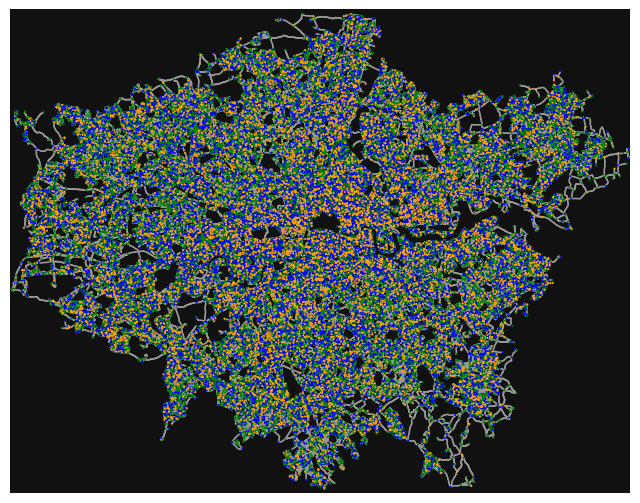

In [18]:
import matplotlib.image as mpimg

# Get the list of graph nodes
nodes_list = list(graph.nodes)

# Division into training, validation and test sets
train_nodes, temp_nodes = train_test_split(nodes_list, test_size=0.3, random_state=42)
val_nodes, test_nodes = train_test_split(temp_nodes, test_size=0.33, random_state=42)

# Creation of sub-graphs
train_graph = graph.subgraph(train_nodes)
val_graph = graph.subgraph(val_nodes)
test_graph = graph.subgraph(test_nodes)

# Plot the entire graph with node colors based on subgraph membership
fig, ax = ox.plot_graph(ox.project_graph(graph), show=False, node_color='gray', node_size=1)

# Update node colors for training, validation, and test subgraphs
node_colors = ['green' if node in train_nodes else 'blue' if node in val_nodes else 'orange' for node in graph.nodes]

# Plot the subgraphs with updated node colors
# Training subgraph: green nodes
# Validation subgraph: blue nodes
# Test subgraph: orange nodes
fig, ax = ox.plot_graph(ox.project_graph(train_graph), ax=ax, show=False, node_color='green', node_size=2)
fig, ax = ox.plot_graph(ox.project_graph(val_graph), ax=ax, show=False, node_color='blue', node_size=2)
fig, ax = ox.plot_graph(ox.project_graph(test_graph), ax=ax, show=False, node_color='orange', node_size=2)

# Save the figure
plt.savefig("london_graph_colored.png")
plt.show()

## **CONVERT THE GRAPH INTO A PYTORCH GEOMETRIC DATA OBJECT**
In this part, we defined the function to transform the subgraphs and the entire graph into a PyTorch Geometric object that is the suitable format for the GNN.

In [19]:
import torch
from torch_geometric.data import Data

import pandas as pd

# Function to convert a subgraph to a DataFrame
def graph_to_dataframe(graph):
    data = {'node_id': list(graph.nodes),
            'latitude': [],
            'longitude': [],
            'street_count': [],
            'degree_centrality': [],
            'number_of_nearest_accidents': [],
            'average_number_of_casualties': [],
            'average_speed_limits': [],
            'severity_category': []}

    for node_id, node_data in graph.nodes(data=True):
        data['latitude'].append(node_data['y'])
        data['longitude'].append(node_data['x'])
        data['street_count'].append(node_data['street_count'])
        data['degree_centrality'].append(node_data['degree_centrality'])
        data['number_of_nearest_accidents'].append(node_data['number_of_nearest_accidents'])
        data['average_number_of_casualties'].append(node_data['average_number_of_casualties'])
        data['average_speed_limits'].append(node_data['average_speed_limits'])
        data['severity_category'].append(node_data['severity_category'])

    df = pd.DataFrame.from_dict(data)
    return df

# Function that converts a graph into a pytorch geometric object
def graph_to_pyg_data(graph1, target):

    # 
    # We create the SubGraph dictionary that create pairs (node_id, count)
    # The node_id si related to the entire graph and not to the subgraph in which
    # the node indices are in the range [0, number of nodes in the subgraph]
    node_id_to_index = {}
    index_counter = 0
    for node_id, node_data in graph1.nodes(data=True):
        node_id_to_index[node_id] = index_counter
        index_counter += 1

    # We get the indices of the subgraph edges
    edge_index = torch.tensor([edge[:2] for edge in graph1.edges]).t().contiguous()
    
    # The problem is that some nodes in the subgraph could have edges that are
    # connected to the nodes of others subgraphs, so we remove these edges
    #Filter edges
    # We get the min and max of the nodes in the subgraph
    min_node_id = min(graph1.nodes)
    max_node_id = max(graph1.nodes)
    
    # We obtain the filtered edges but their indices are related to the entire graph
    edge_index = filter_edges_by_node_indices(edge_index, min_node_id, max_node_id )

    # We use the Subgraph dictionary to map the node_indices into the node_indices of subgraph
    final_edge_index = edge_index.clone()
    for i in range(edge_index.size(1)):
        source_node_id = edge_index[0, i].item()
        target_node_id = edge_index[1, i].item()

        final_source_node_id = node_id_to_index[source_node_id]
        final_target_node_id = node_id_to_index[target_node_id]

        final_edge_index[0,i] = final_source_node_id
        final_edge_index[1,i] = final_target_node_id

    # The procedure also works in the case of the transformation of the entire graph into pytorch geometrci object
        
    node_features = [
        [graph1.nodes[node]['y'],
         graph1.nodes[node]['x'],
         graph1.nodes[node]['street_count'],
         graph1.nodes[node]['degree_centrality'],
         graph1.nodes[node]['number_of_nearest_accidents'],
         graph1.nodes[node]['average_number_of_casualties'],
         graph1.nodes[node]['average_speed_limits']]

        for node in graph1.nodes
    ]

    x = torch.tensor(node_features, dtype=torch.float)
    y = torch.tensor(target, dtype=torch.long)
    
    data = Data(x=x, edge_index=final_edge_index, y=y)

    return data

# Function to filter the edges that are out from the set of nodes that we are considering
def filter_edges_by_node_indices(edge_index, min_node_id, max_node_id):

    count = 0
    filtered_edge_index = torch.tensor([], dtype=torch.long)

    for i in range(edge_index.size(1)):
        source_node_id = edge_index[0, i].item()
        target_node_id = edge_index[1, i].item()

        valid_edge_mask = (
            (source_node_id >= min_node_id) & 
            (source_node_id <= max_node_id) & 
            (target_node_id >= min_node_id) & 
            (target_node_id <= max_node_id)
        )

        # Update the filetered only if the mask is true
        if valid_edge_mask:
            current_edge = edge_index[:, i:i+1]
            filtered_edge_index = torch.cat([filtered_edge_index, current_edge], dim=1)
        
    return filtered_edge_index

# Conversion of Subgraphs in DataFrame in order to get the labels in the next step
df_training = graph_to_dataframe(train_graph)
df_validation = graph_to_dataframe(val_graph)
df_test = graph_to_dataframe(test_graph)

# We create a PyTorch Geometric data for each subgraph
pyg_data_training = graph_to_pyg_data(train_graph, df_training['severity_category'])
pyg_data_validation = graph_to_pyg_data(val_graph, df_validation['severity_category'])
pyg_data_test = graph_to_pyg_data(test_graph, df_test['severity_category'])

# We create a PyTorch Geometric data related to entire graph
pyg_data = graph_to_pyg_data(graph, new_dataset['severity_category'])

print("Pytorch Geometric object of the entire graph")
print(pyg_data)

print("\n")
print("Pytorch Geometric object of the training subgraph")
print(pyg_data_training)

print("\n")
print("Pytorch Geometric object of the validation subgraph")
print(pyg_data_validation)

print("\n")
print("Pytorch Geometric object of the test subgraph")
print(pyg_data_test)


/var/folders/q8/zdlqd5cx781ddy5cw3h82r2m0000gn/T/ipykernel_40588/1104087566.py:84: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  y = torch.tensor(target, dtype=torch.long)


Pytorch Geometric object of the entire graph
Data(x=[128155, 7], edge_index=[2, 299415], y=[128155])


Pytorch Geometric object of the training subgraph
Data(x=[89708, 7], edge_index=[2, 147029], y=[89708])


Pytorch Geometric object of the validation subgraph
Data(x=[25759, 7], edge_index=[2, 12478], y=[25759])


Pytorch Geometric object of the test subgraph
Data(x=[12688, 7], edge_index=[2, 2937], y=[12688])


## **1) TRAINING WITHOUT DIVISION IN BATCH  AND EVALUATION**

In [20]:

from sklearn.metrics import precision_score

# Function to train the model
def train():
      model.train()
      optimizer.zero_grad()
      out = model(pyg_data_training.x, pyg_data_training.edge_index)
      loss = criterion(out, pyg_data_training.y) 
      loss.backward()
      optimizer.step()
      return loss

# Function to validate the model
def val():
      model.eval()
      with torch.no_grad():
        out = model(pyg_data_validation.x, pyg_data_validation.edge_index)
        predictions = torch.argmax(out, dim=1)
        correct_predictions = predictions.eq(pyg_data_validation.y)
        test_accuracy = correct_predictions.sum().item() / len(pyg_data_validation.y)

        precision = precision_score(correct_predictions, predictions, average='weighted')
        recall = recall_score(correct_predictions, predictions, average='weighted')
        f1 = f1_score(correct_predictions, predictions, average='weighted')

        return test_accuracy, precision, recall, f1

# Function to test the model
def test():
    model.eval()
    with torch.no_grad():
        out = model(pyg_data_test.x, pyg_data_test.edge_index)
        predictions = torch.argmax(out, dim=1)
        correct_predictions = predictions.eq(pyg_data_test.y)
        test_accuracy = correct_predictions.sum().item() / len(pyg_data_test.y)

        precision = precision_score(correct_predictions, predictions, average='weighted')
        recall = recall_score(correct_predictions, predictions, average='weighted')
        f1 = f1_score(correct_predictions, predictions, average='weighted')

    return test_accuracy, precision, recall, f1

for epoch in range(1, 200):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# We use out val function
accuracy, precision, recall, f1 = val()
print("Validation")
print(f'Test Accuracy: {accuracy}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# We use out test function
print("Test")
accuracy, precision, recall, f1 = test()

print(f'Test Accuracy: {accuracy}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch: 001, Loss: 10.5661
Epoch: 002, Loss: 4.0255
Epoch: 003, Loss: 3.4860
Epoch: 004, Loss: 3.4266
Epoch: 005, Loss: 5.3175
Epoch: 006, Loss: 1.7792
Epoch: 007, Loss: 2.3873
Epoch: 008, Loss: 2.3936
Epoch: 009, Loss: 2.1812
Epoch: 010, Loss: 2.1111
Epoch: 011, Loss: 1.9863
Epoch: 012, Loss: 1.8964
Epoch: 013, Loss: 1.9071
Epoch: 014, Loss: 1.9942
Epoch: 015, Loss: 1.6427
Epoch: 016, Loss: 3.7830
Epoch: 017, Loss: 1.4195
Epoch: 018, Loss: 1.7293
Epoch: 019, Loss: 1.6942
Epoch: 020, Loss: 1.7204
Epoch: 021, Loss: 1.6437
Epoch: 022, Loss: 2.7746
Epoch: 023, Loss: 1.5884
Epoch: 024, Loss: 1.3164
Epoch: 025, Loss: 1.2518
Epoch: 026, Loss: 1.2462
Epoch: 027, Loss: 1.1453
Epoch: 028, Loss: 1.0904
Epoch: 029, Loss: 1.0843
Epoch: 030, Loss: 1.0382
Epoch: 031, Loss: 1.0898
Epoch: 032, Loss: 0.7785
Epoch: 033, Loss: 1.0540
Epoch: 034, Loss: 0.8089
Epoch: 035, Loss: 0.9536
Epoch: 036, Loss: 0.9123
Epoch: 037, Loss: 0.8357
Epoch: 038, Loss: 0.9869
Epoch: 039, Loss: 0.7561
Epoch: 040, Loss: 0.7271

## **2) TRAINING WITH DIVISION IN BATCH AND EVALUATION**

In [21]:
from torch_geometric.data import DataLoader, Batch  # Import Batch

# Convert the training pytorch geometric object into a list
train_dataset = [pyg_data_training] 

# Batch size for training
batch_size = 133

# Custom collate function to convert Data objects into tensors
def collate(data_list):
    batch = Batch.from_data_list(data_list)  
    return batch.x, batch.edge_index, batch.y

# Create DataLoader for training with the custom collate function
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate)

# Definition of the training function
def train():
    model.train()
    total_loss = 0.0
    for batch in train_loader:
        optimizer.zero_grad()

        #batch_x, batch_edge_index, batch_y = batch.x, batch.edge_index, batch.y

        out = model(batch.x, batch.edge_index)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

# Training loop
for epoch in range(200):

     # Shuffle the training data for each epoch
    train_loader = DataLoader([pyg_data_training], batch_size=133, shuffle=True, collate_fn=collate)

    train_loss = train()

    print(f'Epoch: {epoch:03d}, Loss: {train_loss:.4f}')

   
# We use out val function
accuracy, precision, recall, f1 = val()
print("Validation")
print(f'Test Accuracy: {accuracy}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

print("Test")
# We use out test function
accuracy, precision, recall, f1 = test()

print(f'Test Accuracy: {accuracy}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

/Users/deboroh/Library/Python/3.9/lib/python/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch: 000, Loss: 0.4130
Epoch: 001, Loss: 0.3735
Epoch: 002, Loss: 0.3948
Epoch: 003, Loss: 0.3933
Epoch: 004, Loss: 0.3927
Epoch: 005, Loss: 0.3862
Epoch: 006, Loss: 0.3729
Epoch: 007, Loss: 0.3956
Epoch: 008, Loss: 0.3759
Epoch: 009, Loss: 0.3794
Epoch: 010, Loss: 0.3722
Epoch: 011, Loss: 0.4634
Epoch: 012, Loss: 0.3762
Epoch: 013, Loss: 0.3708
Epoch: 014, Loss: 0.4018
Epoch: 015, Loss: 0.3785
Epoch: 016, Loss: 0.3884
Epoch: 017, Loss: 0.3876
Epoch: 018, Loss: 0.3753
Epoch: 019, Loss: 0.4026
Epoch: 020, Loss: 0.3905
Epoch: 021, Loss: 0.3906
Epoch: 022, Loss: 0.3781
Epoch: 023, Loss: 0.3753
Epoch: 024, Loss: 0.3903
Epoch: 025, Loss: 0.3907
Epoch: 026, Loss: 0.3654
Epoch: 027, Loss: 0.3750
Epoch: 028, Loss: 0.4254
Epoch: 029, Loss: 0.3668
Epoch: 030, Loss: 0.3709
Epoch: 031, Loss: 0.3684
Epoch: 032, Loss: 0.3706
Epoch: 033, Loss: 0.3666
Epoch: 034, Loss: 0.3733
Epoch: 035, Loss: 0.3617
Epoch: 036, Loss: 0.3589
Epoch: 037, Loss: 0.3639
Epoch: 038, Loss: 0.3563
Epoch: 039, Loss: 0.3632


## **OUTPUT EMBEDING OF OUR TRAINING MODEL**
Let us visualizes the 2D embeddings produced by our trained GNN. 

The colors in the plot represent different node labels, providing insight into how well the GCN has grouped nodes with similar labels in the embedding space

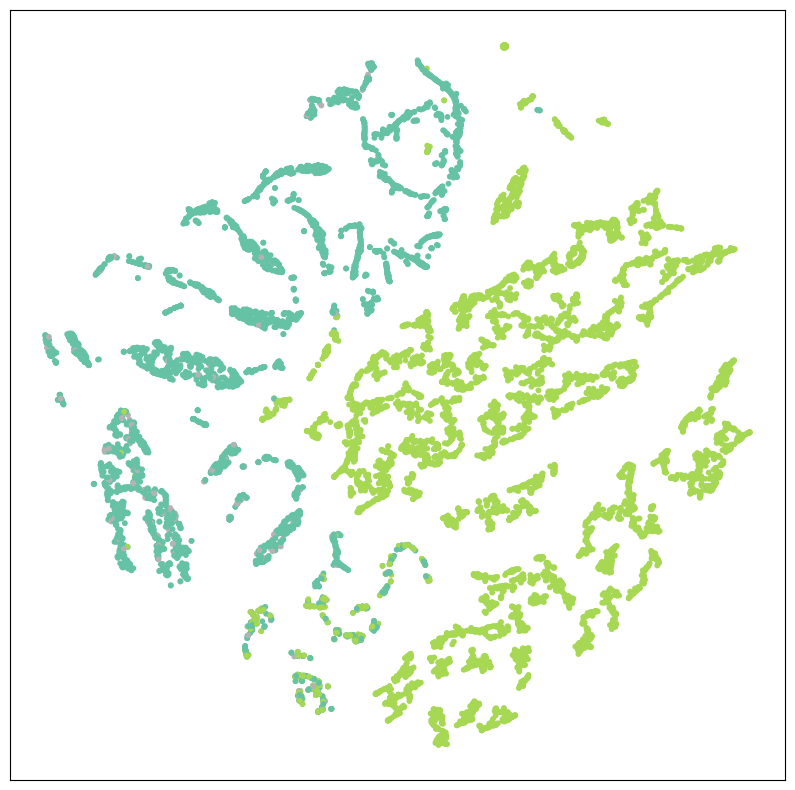

In [22]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to visualize
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=10, c=color, cmap="Set2")

    plt.show()

# We assume that color is a PyTorch tensor
model.eval()
out = model(pyg_data_test.x, pyg_data_test.edge_index)
visualize(out, color=pyg_data_test.y)